### 한국 교육과정 평가원 대학 수학 능력 시험 표준점수-도수분포 데이터 분석 & 시각화

데이터셋 : https://www.data.go.kr/data/15080195/fileData.do

위 데이터를 다운 받아서 2022년도 수능 성적을 분석해봅시다.

In [1]:
import pandas as pd

# 제공된 CSV 파일을 로드하여 구조와 내용 이해
file_path = 'data/한국교육과정평가원_대학수학능력시험 표준점수-도수분포_20221229.csv'
data = pd.read_csv(file_path, encoding='CP949')  # 인코딩 옵션으로 'CP949' 사용

# 데이터프레임의 처음 몇 행 표시
data.head()

,영역,유형,표준점수,남자,여자
0,국어,국어,134,218,153
1,국어,국어,133,469,284
2,국어,국어,132,135,109
3,국어,국어,131,1053,660
4,국어,국어,130,1135,769


### 데이터 시각화

과목별 남녀 표준 점수 분포를 확인한다.

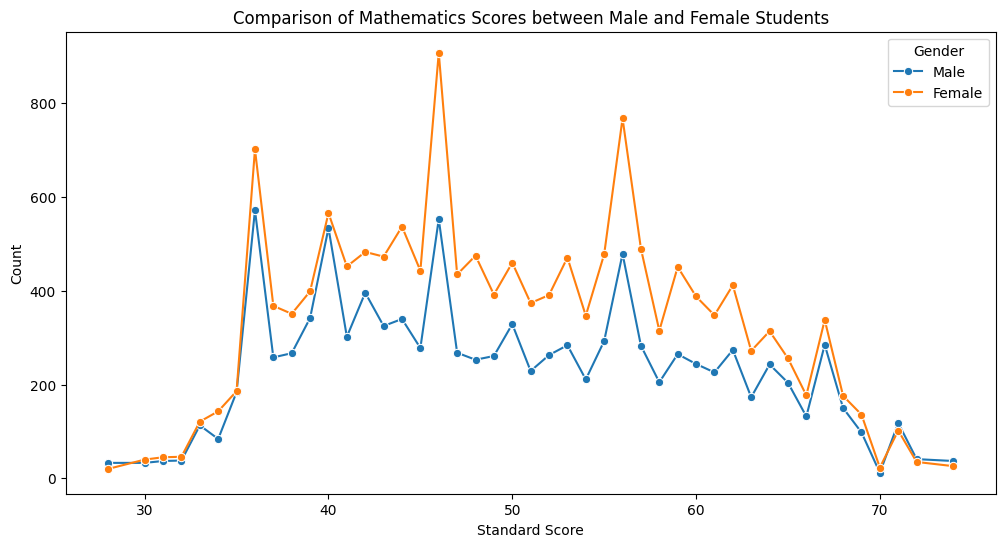

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 칼럼 이름을 영어로 변경
data.rename(columns={'영역': 'Subject', '유형': 'Type', '표준점수': 'Standard Score', '남자': 'Male', '여자': 'Female'}, inplace=True)

# 수학 영역 데이터 필터링
math_data = data[data['Type'] == '정치와 법']

# 그래프를 그리기 쉽게 데이터를 변형
math_melted = math_data.melt(id_vars=['Standard Score'], value_vars=['Male', 'Female'], var_name='Gender', value_name='Count')

# 수학 점수에 대한 남녀 학생들의 비교를 선 그래프로 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=math_melted, x='Standard Score', y='Count', hue='Gender', marker='o')
plt.title('Comparison of Mathematics Scores between Male and Female Students')
plt.xlabel('Standard Score')
plt.ylabel('Count')
plt.show()
